# Part D

In [29]:
#General imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz 
%matplotlib inline
HB = pd.read_csv("bookingHotelsClean2.csv")
EX = pd.read_csv("expidiaHotelsClean2.csv")


In [30]:
#Merge df

marged = HB.merge(EX, on=['Name','TimeToTravel','LengthOfStay','SnapShotDate','Start_Date', 'End_Date'],suffixes=('_right','_left'))

In [31]:
#clean

marged = marged[['index_right', 'Name',  'Rate_right', 'Grade_right',
       'Price_right', 'Review_right', 'TypeRoom', 'TypeBed', 'SnapShotDate',
       'LengthOfStay', 'TimeToTravel', 'Prepayment', 'Location_Battery Park',
       'index_left', 'Rate_left', 'Grade_left', 'Price_left', 'Review_left',
       'Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left',
       'Day_of_month_check_in_left', 'Day_of_month_check_out_left','TypeBed','Cancellation']]

In [32]:
#Save

marged.to_csv('Marged',index=False)

In [33]:
#Rename

marged.rename(columns={'Price_right':'Booking_Price'}, inplace=True)
marged.rename(columns={'Price_left':'EXP_Price'}, inplace=True)
marged.rename(columns={'Rate_right':'Booking_Rate'}, inplace=True)
marged.rename(columns={'Rate_left':'EXP_Rate'}, inplace=True)
marged.rename(columns={'Review_right':'Booking_Review'}, inplace=True)
marged.rename(columns={'Review_left':'EXP_Review'}, inplace=True)
marged.rename(columns={'Grade_right':'Booking_Grade'}, inplace=True)
marged.rename(columns={'Grade_left':'EXP_Grade'}, inplace=True)
marged.rename(columns={'Start_Date_right':'Booking_Start_date'}, inplace=True)
marged.rename(columns={'Start_Date_left':'EXP_Start_date'}, inplace=True)
marged.rename(columns={'End_Date_right':'booking_Date_left'}, inplace=True)
marged.rename(columns={'End_Date_left':'EXP_Date_left'}, inplace=True)

In [34]:
marged['difference'] = marged["Booking_Price"]-marged["EXP_Price"]

In [35]:
marged.to_csv('Marged_T',index=False)

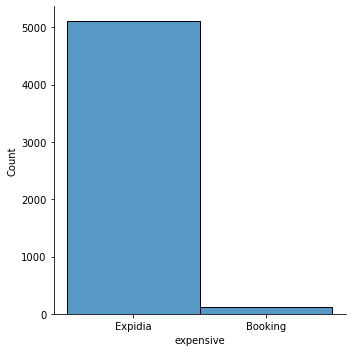

In [36]:
#who is more expensive?

marged.loc[:,'expensive'] = np.where(marged['difference']>0, 'Booking','Expidia')
sns.displot(marged.expensive)

In [37]:
marged[marged["expensive"]==1].count()

index_right                    0
Name                           0
Booking_Rate                   0
Booking_Grade                  0
Booking_Price                  0
Booking_Review                 0
TypeRoom                       0
TypeBed                        0
SnapShotDate                   0
LengthOfStay                   0
TimeToTravel                   0
Prepayment                     0
Location_Battery Park          0
index_left                     0
EXP_Rate                       0
EXP_Grade                      0
EXP_Price                      0
EXP_Review                     0
Distance                       0
Day_of_week_snapshot_left      0
Number_of_weekend_days_left    0
Day_of_month_check_in_left     0
Day_of_month_check_out_left    0
TypeBed                        0
Cancellation                   0
difference                     0
expensive                      0
dtype: int64

In [38]:
marged['Rating_Diff'] = (marged['EXP_Rate']-marged['Booking_Rate'])
marged['Grade_Diff'] = (marged['EXP_Grade']-marged['Booking_Grade'])
marged['Review_Diff'] = (marged['EXP_Review']-marged['Booking_Review'])
marged['Price_Diff'] = (marged['EXP_Price']-marged['Booking_Price'])

In [39]:
#Prepare the data


x = marged[['Grade_Diff','Review_Diff','TimeToTravel','LengthOfStay','TypeRoom', 'Prepayment','Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left','Day_of_month_check_in_left', 'Day_of_month_check_out_left','TypeBed','Cancellation']]
y = marged['Price_Diff']




#test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

RMSE: 304.658
MSE:  92816.597
MAE:  212.125
R2:   0.553


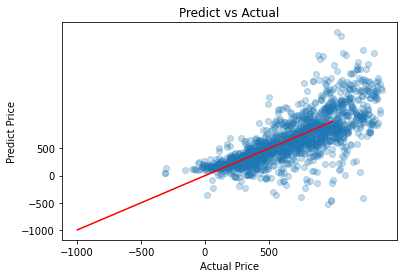

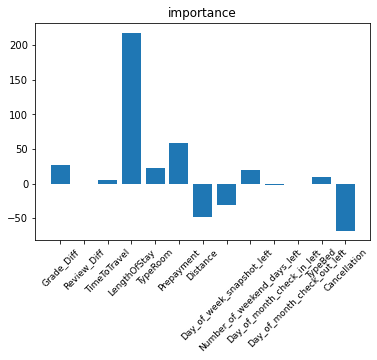

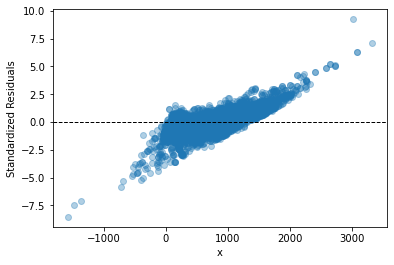

In [40]:
#Function to find RMSE MSE MAE R2

def reg_metrics(y_test, y_pred, x_train):
    
    #imports
    from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


    #calculate
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    
    #print
    print("RMSE: " + str(round(RMSE,3)))
    print("MSE:  " + str(round(MSE,3)))
    print("MAE:  " +  str(round(MAE,3)))
    print("R2:   " + str(round(R2,3)))

#LinearRegression



# Create model
from sklearn import linear_model
reg = linear_model.LinearRegression()
from matplotlib import pyplot


# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)


#Calculate
reg_metrics(y_test, y_pred, x_train)


#visualisation
plt.title('Predict vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predict Price")
X = np.linspace(-1000,1000,100)
Y = 1*X+0
plt.plot(X, Y, '-r')
plt.scatter(y_pred,y_test,alpha=0.25)
plt.xticks(np.arange(-1000,1000,step=500))
plt.yticks(np.arange(-1000,1000,step=500))
plt.show()




# get importance
plt.title('importance')
importance = reg.coef_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()





import statsmodels.api as sm

#add constant to predictor variables
x_r = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x_r).fit() 


#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal



plt.scatter(marged['Price_Diff'], standardized_residuals,alpha=0.35)
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()



RMSE: 267.815
MSE:  71725.016
MAE:  183.808
R2:   0.654


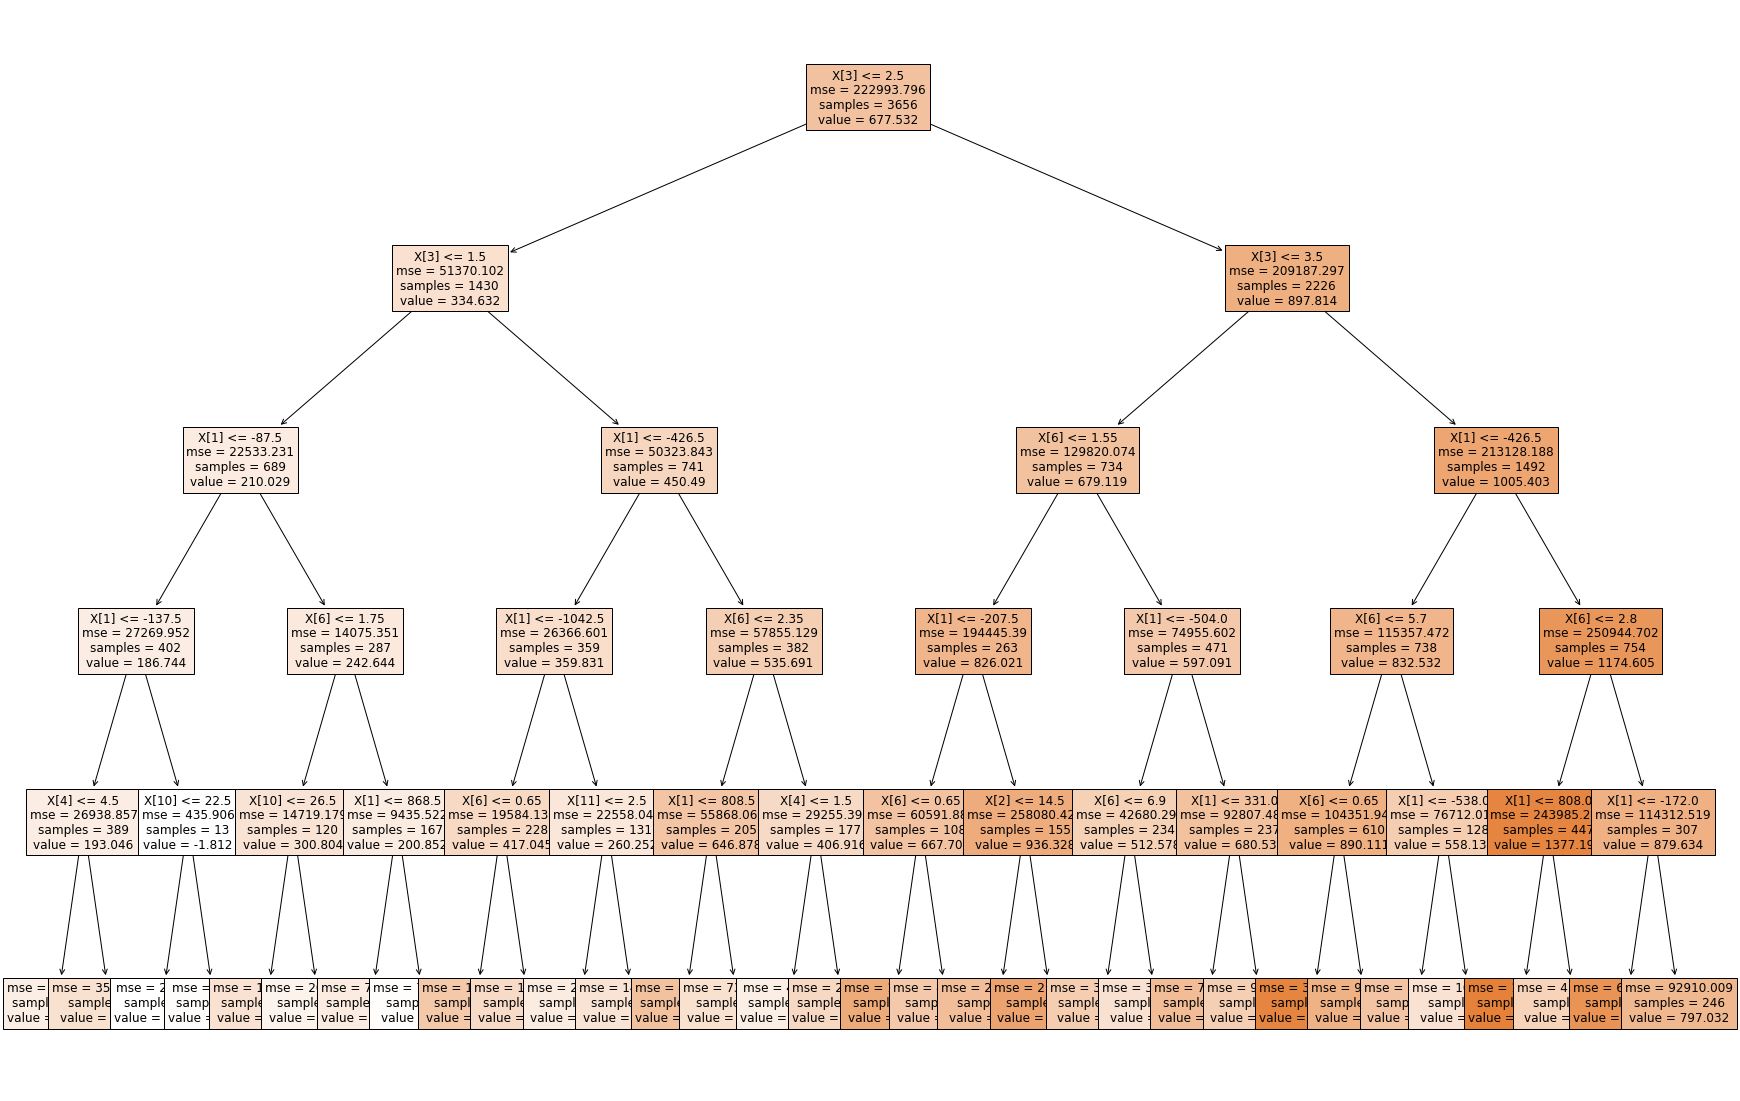

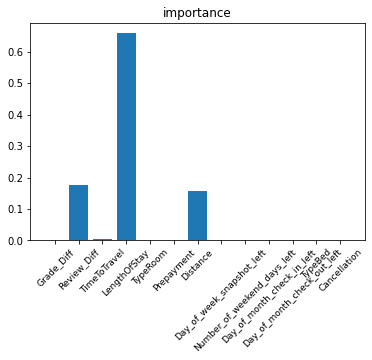

In [41]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# the best Tree regressor
 
reg = tree.DecisionTreeRegressor(criterion='mse', max_depth=5 , min_samples_leaf=3, random_state=101)

# Train the model
        
reg.fit(x_train, y_train)
    
# Make predictions
y_pred = reg.predict(x_test)

#Calculate
reg_metrics(y_test, y_pred, x_train)


#Visualisation
# Plot the decision tree
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(reg, filled=True, fontsize=12, ax=ax)
plt.show()


# get importance
plt.title('importance')
importance = reg.feature_importances_
# summarize feature importance
pyplot.bar([x.columns[j] for j in range(len(importance))], importance)
pyplot.xticks(fontsize = 9,rotation=45)
pyplot.show()

In [42]:
#GaussianProcessRegressor

data = marged[['Price_Diff','Grade_Diff','Review_Diff','TimeToTravel','LengthOfStay','TypeRoom', 'Prepayment','Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left','Day_of_month_check_in_left', 'Day_of_month_check_out_left','Cancellation']]



#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
normalized = pd.DataFrame(scaled, columns = data.columns)
sampled = normalized.sample(frac=0.06)

x = sampled[['Grade_Diff','Review_Diff','TimeToTravel','LengthOfStay','TypeRoom', 'Prepayment','Distance','Day_of_week_snapshot_left', 'Number_of_weekend_days_left','Day_of_month_check_in_left', 'Day_of_month_check_out_left','Cancellation']]
y = sampled['Price_Diff']




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



# Create model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
kernel = ConstantKernel(1.0) + ConstantKernel(1.0) * RBF(10)  + WhiteKernel(5)
reg = GaussianProcessRegressor(kernel=kernel)

# Train the model
reg.fit(x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)

#Calculate
reg_metrics(y_test, y_pred, x_train)

RMSE: 0.066
MSE:  0.004
MAE:  0.046
R2:   0.552


In [46]:
marged['Rating_AVG'] = (marged['EXP_Rate']+marged['Booking_Rate'])/2
marged['Grade_AVG'] = (marged['EXP_Grade']+marged['Booking_Grade'])/2
marged['Review_AVG'] = (marged['EXP_Review']+marged['Booking_Review'])/2
marged['Price_AVG'] = (marged['EXP_Price']+marged['Booking_Price'])/2
marged
#Mimshak
L_nights = input('Enter num of nights please: ')

Enter num of nights please: 3


In [47]:
L_r = intype=input('Enter type of room please: ')

Enter type of room please: 3


In [48]:
L_MP = intype=input('Enter Max price you want to pay ')

Enter Max price you want to pay 3000


In [49]:
L_D = intype=input('Enter Max Distance you want to stay at ')

Enter Max Distance you want to stay at 5


In [50]:
L_Ra = intype=input('Enter Max Rate of hotel you want to stay at ')

Enter Max Rate of hotel you want to stay at 9


In [ ]:
int(L_Ra)

In [51]:
res = marged[(marged.LengthOfStay == int(L_nights)) & (marged.TypeRoom == int(L_r)) &  (marged.Distance < int(L_D)) & (marged.Rating_AVG < int(L_Ra)) ]

In [52]:
print("Good Choice!!")
print("Let us remind you what you chose for your next vacation:")
print("night to stay = ",L_nights )
print("Room Type = ",L_r )
print("Max Price = ",L_MP )
print("Max Distance from the center = ",L_D)
print("Max Horel Rate = ",L_Ra)
print("List of optional hotels")
res

Good Choice!!
Let us remind you what you chose for your next vacation:
night to stay =  3
Room Type =  3
Max Price =  3000
Max Distance from the center =  5
Max Horel Rate =  9
List of optional hotels


,index_right,Name,Booking_Rate,Booking_Grade,Booking_Price,Booking_Review,TypeRoom,TypeBed,SnapShotDate,LengthOfStay,...,difference,expensive,Rating_Diff,Grade_Diff,Review_Diff,Price_Diff,Rating_AVG,Grade_AVG,Review_AVG,Price_AVG
43,214,Pod Times Square,8.1,8,1896.0,12925,3,2,2023-03-22,3,...,-560.25,Expidia,0.5,1,-10126,560.25,8.35,8.5,7862.0,2176.125
46,226,The Benjamin Royal Sonesta New York,7.6,7,2807.0,594,3,2,2023-03-22,3,...,-950.08,Expidia,1.2,2,406,950.08,8.20,8.0,797.0,3282.040
58,263,1 Hotel Central Park,8.4,8,4797.0,490,3,2,2023-03-22,3,...,-1337.73,Expidia,0.6,1,511,1337.73,8.70,8.5,745.5,5465.865
141,719,Pod Times Square,8.1,8,1749.0,12925,3,2,2023-03-22,3,...,-538.26,Expidia,0.5,1,-10126,538.26,8.35,8.5,7862.0,2018.130
151,789,The Shelburne Sonesta New York,7.8,7,1880.0,1162,3,2,2023-03-22,3,...,-882.79,Expidia,0.4,1,-158,882.79,8.00,7.5,1083.0,2321.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,13704,Pod Times Square,8.1,8,2361.0,13015,3,2,2023-03-26,3,...,-680.82,Expidia,0.5,1,-10207,680.82,8.35,8.5,7911.5,2701.410
5175,13717,Empire Hotel,6.8,6,2351.0,2547,3,2,2023-03-26,3,...,-679.03,Expidia,0.6,1,-1218,679.03,7.10,6.5,1938.0,2690.515
5176,13718,The Moore,8.5,8,3010.0,884,3,2,2023-03-26,3,...,-460.19,Expidia,0.7,1,-797,460.19,8.85,8.5,485.5,3240.095
5185,13774,The Marlton Hotel,8.2,8,2934.0,657,3,1,2023-03-26,3,...,-524.40,Expidia,0.8,1,344,524.40,8.60,8.5,829.0,3196.200


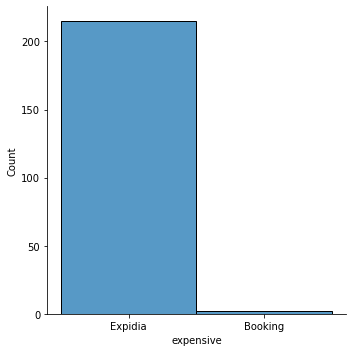

In [54]:
#who is more expensive?

res.loc[:,'expensive'] = np.where(res['difference']>0, 'Booking','Expidia')
sns.displot(res.expensive)